In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset
from google.colab import files
uploaded = files.upload()

# Read the CSV file
data = pd.read_csv('diabetes.csv')
data.head()


Saving diabetes.csv to diabetes.csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
# Check for missing values
print(data.isnull().sum())

# Feature and target separation
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Feature Engineering
def create_features(df):
    df['Glucose_insulin_ratio'] = df['Glucose'] / (df['Insulin'] + 1)
    df['BMI_age_ratio'] = df['BMI'] / (df['Age'] + 1)
    df.fillna(0, inplace=True)
    return df

# Apply feature engineering to the entire dataset
X = create_features(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [29]:
# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [30]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics
print(classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154

ROC AUC Score: 0.816712580348944


In [32]:
# Save the model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Save the feature engineering function
with open('create_features.pkl', 'wb') as feature_file:
    pickle.dump(create_features, feature_file)


In [33]:
# Load the model
with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Load the scaler
with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Load the feature engineering function
with open('create_features.pkl', 'rb') as feature_file:
    create_features = pickle.load(feature_file)


In [36]:
def predict_diabetes(input_features):
    # Create a DataFrame for the input features
    df = pd.DataFrame([input_features], columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
    # Apply feature engineering
    df = create_features(df)
    # Scale the features
    input_features_scaled = scaler.transform(df)
    # Make prediction
    prediction = model.predict(input_features_scaled)
    probability = model.predict_proba(input_features_scaled)[0][1]  # Probability of having diabetes

    # Presentable output
    if prediction[0] == 1:
        result = f"The model predicts that the person is likely to have diabetes with a probability of {probability:.2f}."
    else:
        result = f"The model predicts that the person is unlikely to have diabetes with a probability of {1 - probability:.2f}."

    return result

# Example usage
input_features = [6, 148, 72, 35, 0, 33.6, 0.627, 50]
print("Prediction:", predict_diabetes(input_features))


Prediction: The model predicts that the person is likely to have diabetes with a probability of 0.92.


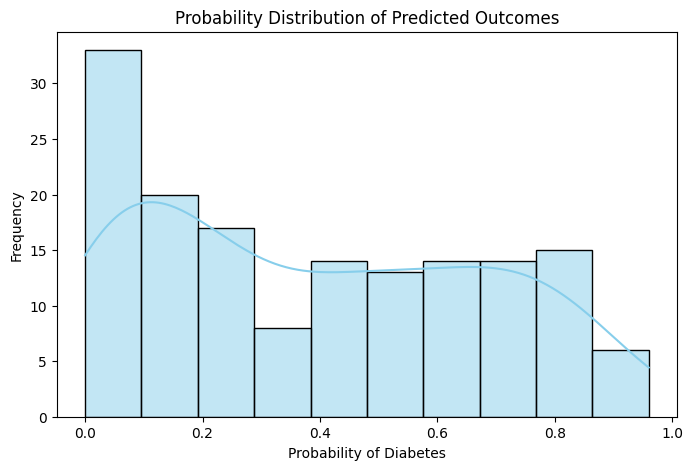

In [37]:
def plot_probability_distribution(y_prob):
    plt.figure(figsize=(8, 5))
    sns.histplot(y_prob, bins=10, kde=True, color='skyblue')
    plt.title('Probability Distribution of Predicted Outcomes')
    plt.xlabel('Probability of Diabetes')
    plt.ylabel('Frequency')
    plt.show()

# Plot probability distribution for test set
plot_probability_distribution(y_prob)
